# **Tema: Análisis de Mercado de Ropa de Tallas Extra. Parte 4**

Desde módulos anteriores se tomo como tema a desarrollar el análisis del mercado de venta de Ropa de talla extra, esto por la **creciente demanda** de este sector en nuestro país y fuera de él .

La *obesidad y el sobrepeso* han sido temas recurrentes en México durante décadas no se ha parado de exponer las complicaciones de salud que conlleva padecer dichas enfermedades, sin embargo, adentrándonos a la vida cotidiana de este nicho , es evidente que más problemas se han creado alrededor de ello.

*¿Pero de qué estamos hablando? *

Partimos de la importancia de dignificar el vestir de una persona con sobrepeso, en la industria de la confección. Este sector de la Moda se denomina de varias maneras, tanto como tallas especiales, tallas extras o tallas CURVI.

En el primero modulo se analizaron aspectos geográficos estableciendo la óptima ubicación de puntos de venta, tomando como base el poder adquisitivo por estado, los índices de obesidad por estado los cuales muestran alto aumento del porcentaje de obesidad  en una tendencia lineal, afluencia de personas por sector en el estado, se comparo el ECI el Indice de Complejidad económica y el PIB producto interno bruto,el primero es una cualidad que predice el desarrollo económico esta variable nos ayudo a ver las capacidades existentes y potenciales con las que cuenta específicamente cada estado, mientras que el segundo se relaciona con los valores monetarios de los bienes y servicios, por lo que entre mayor sea la variable , mayor será el poder adquisitivo del estado.






 viendo asi una  optimización de una marca específica representante de la distribución de este tipo de ropa. 




<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1DBrCrecVHtp5bWTubz1kuxK6utpxZ_yF?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Calculadora de tallas</a>
  </td>
   <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1DqTnvllOYJosrBMAQBuCyC7cB28GCsar?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Clasificador de Ropa</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Deltarios/analisis_ropa_bedu_4"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />REPOSITORIO</a>
  </td>
</table>

In [ ]:
from scipy import stats # scipy - scientific python, stats - estadística
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
from sklearn.model_selection import train_test_split
#import lightgbm as lgb
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud

In [ ]:
nuevo_leon_poi = pd.read_csv('https://raw.githubusercontent.com/Axelflg/datasets/main/nuevo_leon_poi_cleanv1.0.csv')

In [ ]:
nuevo_leon_poi.head()

,Unnamed: 0,nombre_tienda,razon_social,sector_tienda,cantidad_personal,tipo_vialidad,calle,num_exterior,num_interior,colonia,codigo_postal,ubicacion,telefono,correo,pagina_web,longitud,latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,municipio,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,place_id,categoria,popularidad_actual,horarios_populares,rating,rating_numero,horarios_populares_dias,tiempo_espera
0,0,"Monterrey, plaza cumbres",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,HACIENDA DE PEÑUELAS,6771,0,CUMBRES LAS PALMAS,64349,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,WWW.SHASA.COM,-100.397801,25.733109,CENTRO Y PLAZA COMERCIAL,PLAZA CUMBRES,1151 A 1157,Monterrey,Sin especificar,42.2707,6098.849922,1578,5,ChIJzdEedx2XYoYRunctbvVhb-I,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
1,1,"Monterrey, gal.valle ote",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,CALLE,PASEO NARANJO,1000,0,VALLE DEL MIRADOR,64750,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,WWW.SHASA.COM,-100.313720,25.638831,CENTRO Y PLAZA COMERCIAL,GALERIAS VALLE ORIENTE,1144 Y 1146,Monterrey,Sin especificar,42.2707,6098.849922,1578,12,Sin especificar,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
2,2,"Monterrey, san agustin",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,Batallón San Patricio,1000,0,REAL DE SAN AGUSTIN,66260,"SAN PEDRO GARZA GARCÍA, San Pedro Garza García...",0.0,Sin especificar,WWW.SHASA.COM,-100.336835,25.648094,CENTRO Y PLAZA COMERCIAL,PLAZA FIESTA SAN AGUSTIN,SN,San Pedro Garza Garcia,A,35.1730,4634.679777,247,4,ChIJ8VltnG6-YoYRnDAJPlfzjRk,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
3,3,Ropa dama y cosmeticos,10 ROPA DAMA Y COSMETICOS,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,SERAFIN PEÑA,1010,10,MONTERREY CENTRO,64000,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,Sin especificar,-100.326419,25.667601,"TIANGUIS, BAZAR O PULGA",PULGA RIO MONTERREY,10,Monterrey,Sin especificar,42.2707,6098.849922,1578,282,ChIJRZ7FCCK-YoYRLz6AgoPG-Ws,"['Shopping mall', 'Down home cooking restauran...",12,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '...",4.1,5618.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[25, 25]"
4,4,Ropa dama,106 ROPA DAMA,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,SERAFIN PEÑA,1010,0,MONTERREY CENTRO,64000,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,Sin especificar,-100.326419,25.667601,"TIANGUIS, BAZAR O PULGA",PULGA RIO MONTERREY,106,Monterrey,Sin especificar,42.2707,6098.849922,1578,282,Sin especificar,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar


In [ ]:
# Eliminamos las columnas que no nos sirven
nuevo_leon_poi = nuevo_leon_poi.drop(columns=['Unnamed: 0'])

In [ ]:
nuevo_leon_poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nombre_tienda             3695 non-null   object 
 1   razon_social              3695 non-null   object 
 2   sector_tienda             3695 non-null   object 
 3   cantidad_personal         3695 non-null   object 
 4   tipo_vialidad             3695 non-null   object 
 5   calle                     3695 non-null   object 
 6   num_exterior              3695 non-null   int64  
 7   num_interior              3695 non-null   int64  
 8   colonia                   3695 non-null   object 
 9   codigo_postal             3695 non-null   int64  
 10  ubicacion                 3695 non-null   object 
 11  telefono                  3695 non-null   float64
 12  correo                    3695 non-null   object 
 13  pagina_web                3695 non-null   object 
 14  longitud

# Algoritmos no supervisados


In [ ]:
# Vamos a empezar a Manipular los datos, para este primer análisis solo nos enfocaremos en dos variables "porcentaje_obesidad" y "valor_comercial"
X = nuevo_leon_poi.iloc[:,21:23].values # Con iloc indico que me traiga las columnas deseadas

In [ ]:
X

array([[   42.2707  ,  6098.849922],
       [   42.2707  ,  6098.849922],
       [   35.173   ,  4634.679777],
       ...,
       [   42.2707  ,  6098.849922],
       [   42.2707  ,  6098.849922],
       [   45.3691  , 11257.508571]])

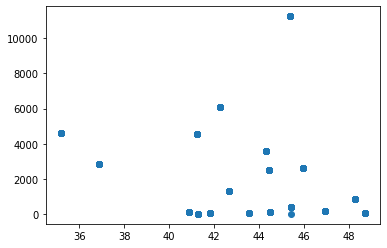

In [ ]:
# Mapeo el "Porcentaje de Obesidad" vs el "Valor Comercial"
x1 = X[:,0]
y1 = X[:,1]
plt.scatter(x1,y1) 
plt.show()

# El patrón no es completamente lineal, pero sí se puede ver cierto patrón, concentrandose un incremento en el valor comercial cuando los datos del porcentaje_obesidad se acercan a los estimados de locación (que vimos en el módulo pasado después de 
# eliminar los valores atípicos utilizando el SCORE de Rango Intercuartílico IQR-Score)
#   mean      43.061508
#   median    42.270700 
# En este caso es un poco dificil identificar el número de clusters que debemos utilizar, por lo que utilizaremos el métodos del codo y la silueta para auxiliarnos.

##Clusterización por K-means

Vamos a elegir la cantidad de clusters.

**Within clusters sum of squares**, es la suma cuadratica de la distancia de los clusters, esto nos ayuda a saber en promedio cual va a ser la distancia que va existir desde todos los puntos hasta cada cluster que vamos a tener, y eso nos va a permitir decidir la cantidad indicada de clusters, es decir debemos elegir una cantidad de clusters de acuerdo a que la similitud que existe entre cada grupo sea distante, pero la similitud que guarda cada punto que exista para cada uno de los clusters sea lo más cercana. Por lo que el propósito es tener grupos alejados entre sí, pero que los elementos dentro de ese cluster sean muy parecidos.


**MÉTODO DEL CODO** Lo que nos dice es que yo tengo una cantidad de clusters y a su vez tengo la suma de los cuadrados de la distancia que existe de cada punto con respecto al centroide.

Al graficar esa suma de cuadrados para cada uno de los clusters, va a suceder que al principio esa distancia que existe se vuelva empinada, pero eventualmente tiende a ser similar, cuando ya no hay un cambio significativo ya no necesitamos esa cantidad de clusters.

ANÁLISIS:

El criterio de desión es que la distancia que hay entre cada grupo debe ser lo más distante.
Podemos ver que cuando tentemos 4, 6, 8, 10 ya no tenemos un número óptimo. Se puede argumentar que 3 clusters pudieran ser una cantidad adecuada, sin embargo, para tomar la dedicisión nos apoyaremos del método de la SILUETA

In [ ]:
from tqdm import tqdm # Te muestra el tiempo que tarda cada una de las iteraciones (loop) y se suma hasta que se tenga el tiempo completo, es util cuando se tienen entrenamiento largos, en especial con imagenes, se tiene que usar cuando se usa el loop

In [ ]:
# MÉTODO DEL CODO
from sklearn.cluster import KMeans
wcss = [] 
for i in  tqdm(range(2,10)): # Usamos tqdm para ver el tiempo de cada loop
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=15, max_iter = 500, random_state= 50) # El número de clusters va a ser igual a i
                                                                                                    # k-means++ es un contador ascendente
                                                                        
    kmeans.fit(X) # Utilizamos la embonación. En esta ocasción no estamos usando train_test_split para generar la partición, vamos a decir que son todos los datos
    wcss.append(kmeans.inertia_) # con el append hacemos que nos vaya guardando los resultados de cada loop en la variable que creamos de wcss
                           

100%|██████████| 8/8 [00:00<00:00, 12.29it/s]


**MÉTODO DE LA SILUETA**

El método de la silueta es muy parecido al del codo.
Con el método de la silueta se saca la distancia que hay de un punto al centroide, y la distancia que hay de ese punto al grupo clusterizado más cercano, lo que se busca es que este último valor se maximice.

Para cersiorarnos que el método del codo (Incercia) nos funciona, nos apoyaremos con el método de la silueta.

ANÁLSIS:

En el método de la silueta el Score más alto es el que nos interesa
El método de la silueta me dice que el número de clusters ideal podría ser 7 porque después de esto ya no hay un cambio.




In [ ]:
# MÉTODO DE LA SILUETA
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

silhouette = {} # Creamos un diccionario

for i in tqdm(range(2, 10)):
  kmeans =  cluster.KMeans(n_clusters = i, init = 'k-means++', n_init=15, max_iter = 500, random_state=50) 
  kmeans.fit(X)
  silhouette[i] = silhouette_score(X, kmeans.labels_, metric = 'euclidean') # Utilizamos 'i' como la variable de iteración
                                                                                       # Utilizamos como métrica la distancia euclidiana   

100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


**Graficamos ambos métodos del CODO y de la SILUETA**

**DECISIÓN:**

Tras este análisis obtenemos dos valores diferentes. Mientras que el método del codo nos dide que el número de clusters ideal son 3, el método de la silueta nos dice que son 7. Vamos a utilizar estas cantidades de clusters para verificar cuál es le valor más correcto

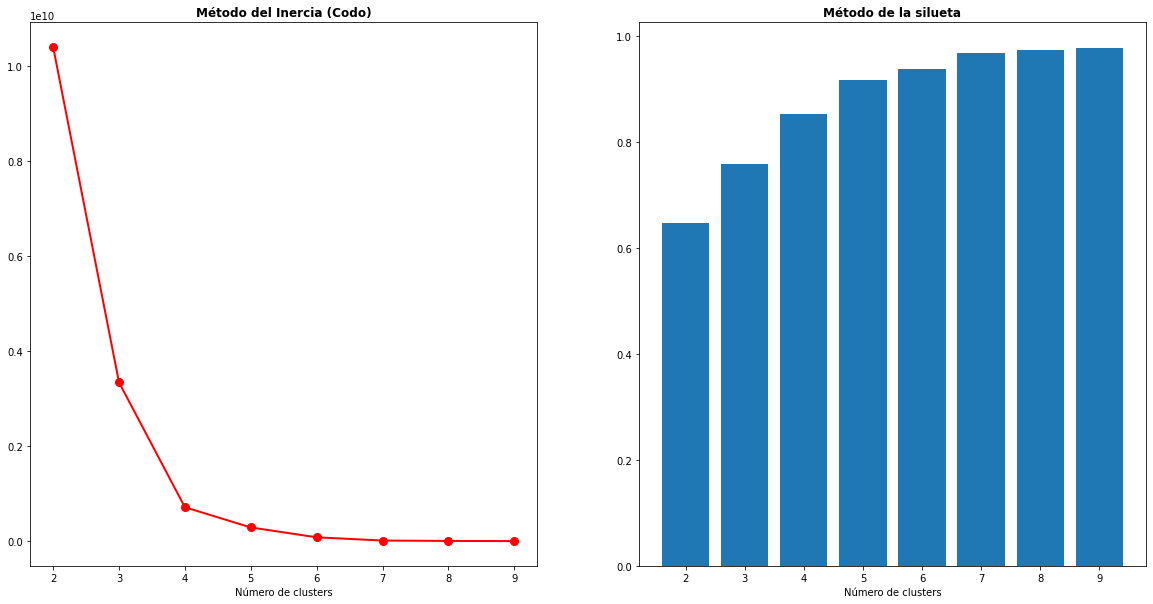

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1) # Hacemos dos gráficas emparentadas, una después de la otra
plt.plot(range(2, len(wcss)+2), wcss, marker = 'o', lw=2, ms=8, color= 'red') # Con marker le indico que me maque los codos
plt.xlabel("Número de clusters")
plt.title('Método del Inercia (Codo)',fontweight = 'bold')
plt.subplot(1,2,2)

plt.bar(range(len(silhouette)), list(silhouette.values()))
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.title('Método de la silueta',fontweight = 'bold')
plt.xlabel("Número de clusters")

plt.show()

### Gráfiquemos visualmento nuestros centroides y los clusters

Graficamos con la elección de 3 clusters obtenidos por el método del codo. Sin embargo, si tomamos en consideración esta cantidad de clusters, vemos de primera inciancia que nuestros datos sobre estas dos variables no se encuentran tan dispersos, por lo que incrementar el númnero de clusters no parece lo más conveniente. Debido a esto mantenmos la misma cantidad de clusters elegidos a 3 clusters. 

Aquí podemos ver una clusterización de tiendas localizadas en un municipio con mayor valor comercial y menor porcentaje de obesidad, y por otra parte tiendas localizadas en municipios con medianamente valor comercial y porcentaje de obesidad.

Más adelante vamos a realizar un análisis de componentes principales, que describan de mejor forma nuestro estudio.

[[   41.78668862  5360.19006526]
 [   43.3048886    815.80736764]
 [   45.3691     11257.508571  ]]
[0 0 0 ... 0 0 2]


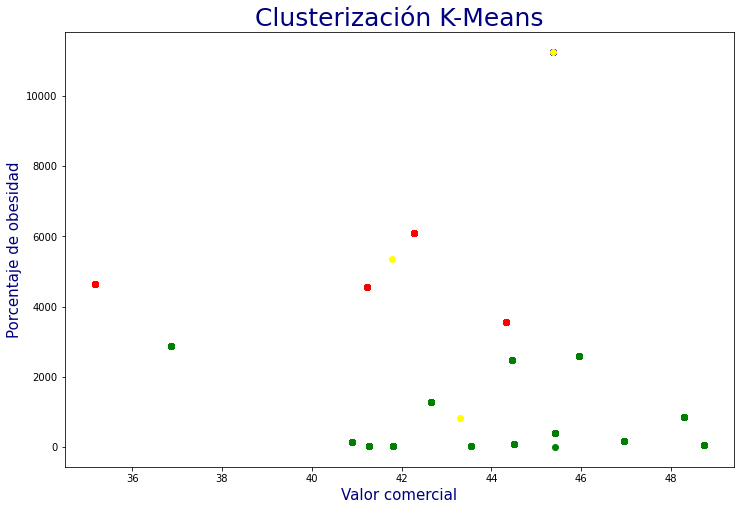

In [ ]:
kmeans = KMeans( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_)

nuevo_leon_poi_3clusters = nuevo_leon_poi.copy()

clusters = kmeans.fit_predict(X) # Utilizamos predict
nuevo_leon_poi_3clusters["label"] = clusters #  Vamos a generar una nueva variable que se llame "label" dentro de "data" y voy a igualarla con Clusters
print(clusters) # Aquí imprimimos el cluster que corresponse, 0 es el primer cluster, 1 es el segundo y 2 es el tercero
                # 0, 1 y 2 es una variable categórica que empata a que cluster empata cada observación

# Clusterización sirve muy bien para segmentar, utilizamos una clasificación geométrica para comenzar a clasificar nuestros puntos 
fig = plt.figure(figsize=(12, 8))
plt.scatter(nuevo_leon_poi_3clusters.porcentaje_obesidad[nuevo_leon_poi_3clusters.label == 0 ],nuevo_leon_poi_3clusters.valor_comercial[nuevo_leon_poi_3clusters.label == 0],color = "red") # Label == 0 indica los elementos que pertenecen al primer cluster
plt.scatter(nuevo_leon_poi_3clusters.porcentaje_obesidad[nuevo_leon_poi_3clusters.label == 1 ],nuevo_leon_poi_3clusters.valor_comercial[nuevo_leon_poi_3clusters.label == 1],color = "green")
plt.scatter(nuevo_leon_poi_3clusters.porcentaje_obesidad[nuevo_leon_poi_3clusters.label == 2 ],nuevo_leon_poi_3clusters.valor_comercial[nuevo_leon_poi_3clusters.label == 2],color = "blue")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "yellow") # Pintamos los centroides, posición 'x' y 'y'
plt.title('Clusterización K-Means',fontsize=25, ha="center", color='Navy');
plt.ylabel('Porcentaje de obesidad',fontsize=15, ha="center", color='Navy');
plt.xlabel('Valor comercial',fontsize=15, ha="center", color='Navy');


## PCA - Componentes Prinicipales

Ahora realizaremos un análisis de las tiendas de ropa en Monterrey con base en los componentes principales. Y buscaremos la cantidad ideal de clusters en las que estos deberán ser agrupados.

In [ ]:
nuevo_leon_poi_pca = nuevo_leon_poi

In [ ]:
nuevo_leon_poi_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nombre_tienda             3695 non-null   object 
 1   razon_social              3695 non-null   object 
 2   sector_tienda             3695 non-null   object 
 3   cantidad_personal         3695 non-null   object 
 4   tipo_vialidad             3695 non-null   object 
 5   calle                     3695 non-null   object 
 6   num_exterior              3695 non-null   int64  
 7   num_interior              3695 non-null   int64  
 8   colonia                   3695 non-null   object 
 9   codigo_postal             3695 non-null   int64  
 10  ubicacion                 3695 non-null   object 
 11  telefono                  3695 non-null   float64
 12  correo                    3695 non-null   object 
 13  pagina_web                3695 non-null   object 
 14  longitud

Vamos a limpiar nuestro dataset de todos aquellos campos que si bien sí son informativos, no son numéricos o no cuentan con suficiente información respecto al total de registros del dataset.

In [ ]:
# Eliminamos las columnas que no nos sirven
nuevo_leon_poi_pca = nuevo_leon_poi.drop(columns=['nombre_tienda', 'razon_social', 'sector_tienda', 'tipo_vialidad', 'calle', 'num_exterior', 'num_interior', 'colonia', 'codigo_postal', 'ubicacion', 'telefono', 'correo', 'pagina_web', 'longitud', 'latitud', 'tipo_corredor_industrial', 'nom_corredor_industrial', 'numero_local', 'municipio', 'place_id', 'categoria', 'popularidad_actual', 'horarios_populares', 'horarios_populares_dias', 'tiempo_espera'])

In [ ]:
nuevo_leon_poi_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cantidad_personal         3695 non-null   object 
 1   dimension_tienda          3695 non-null   object 
 2   porcentaje_obesidad       3695 non-null   float64
 3   valor_comercial           3695 non-null   float64
 4   numero_tiendas_municipio  3695 non-null   int64  
 5   numero_tiendas_colonia    3695 non-null   int64  
 6   rating                    3695 non-null   float64
 7   rating_numero             3695 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 231.1+ KB


Cambiamos valores categóricos a valores numéricos. Para este cambio consideramos los campos:
*   cantidad_personal: en este campo se asignaba un rango de valores, para considerar un valor numérico se asignará el valor medio del rango.
*   dimension_tienda: en este campo se asignaban valores categóricos A, B y C, indicando el tamaño de la tienda, es decir, Grande, Mediana, Pequeña respectivamente. Por lo que se sustituirán por vaalores numéricos (3, 2 y 1), siendo el número 3 el correspondiente a las tiendas grandes. Para aquellas tiendas que tengan una dimensión sin especificar se les asignará un valor de 0.

In [ ]:
# Tomamos el valor intermedio redondeado
nuevo_leon_poi_pca['cantidad_personal'] = nuevo_leon_poi_pca['cantidad_personal'].str.replace('0 a 5 personas', '3')
nuevo_leon_poi_pca['cantidad_personal'] = nuevo_leon_poi_pca['cantidad_personal'].str.replace('6 a 10 personas', '8')
nuevo_leon_poi_pca['cantidad_personal'] = nuevo_leon_poi_pca['cantidad_personal'].str.replace('11 a 30 personas', '21')
nuevo_leon_poi_pca['cantidad_personal'] = nuevo_leon_poi_pca['cantidad_personal'].str.replace('31 a 50 personas', '41')
nuevo_leon_poi_pca['cantidad_personal'] = nuevo_leon_poi_pca['cantidad_personal'].str.replace('51 a 100 personas', '76')
nuevo_leon_poi_pca['cantidad_personal'] = nuevo_leon_poi_pca['cantidad_personal'].str.replace('101 a 250 personas', '176')
nuevo_leon_poi_pca['cantidad_personal'] = nuevo_leon_poi_pca['cantidad_personal'].str.replace('251 y más personas', '251')

In [ ]:
nuevo_leon_poi_pca['dimension_tienda'] = nuevo_leon_poi_pca['dimension_tienda'].str.replace('A', '3')
nuevo_leon_poi_pca['dimension_tienda'] = nuevo_leon_poi_pca['dimension_tienda'].str.replace('B', '2')
nuevo_leon_poi_pca['dimension_tienda'] = nuevo_leon_poi_pca['dimension_tienda'].str.replace('C', '1')
nuevo_leon_poi_pca['dimension_tienda'] = nuevo_leon_poi_pca['dimension_tienda'].str.replace('Sin especificar', '0')

In [ ]:
# Convertimos a enteros el Número exterior
nuevo_leon_poi_pca['cantidad_personal'] = pd.to_numeric(nuevo_leon_poi_pca['cantidad_personal'],  downcast='integer')
nuevo_leon_poi_pca['dimension_tienda'] = pd.to_numeric(nuevo_leon_poi_pca['dimension_tienda'],  downcast='integer')

Realizamos un Crosstab para verificar los posibles valores. Y podemos ver que la mayor parte de las tiendas con una dimensión sin especificar son las que con mayor frecuencia tienen solo 3 empleados. Seguido por las tiendas de tamaño pequeño (1) también con 3 empleados.

In [ ]:
pd.crosstab(nuevo_leon_poi_pca['dimension_tienda'], nuevo_leon_poi_pca['cantidad_personal'])

cantidad_personal,3,8,21,41,76,176,251
dimension_tienda,,,,,,,
0,2446,113,63,22,18,5,2
1,840,81,13,3,0,0,0
2,7,4,29,4,4,0,0
3,4,10,18,0,8,1,0


Al hacer un describe sobre el dataset, podemos ver que cada uno de los campos tienen diferente escala. Por lo que más adelante tendremos que corregir esto porque la clusterización y el análisis de componentes principales, requieren que los campos estén en la misma escala.

Sin embargo, por ahora, analizando estos datos podemos notar lo siguiente:
*   Las tiendas suelen tener en promedio 5 empleados
*   La mayor parte de las tiendas son de una dimensión pequeña o sin especificar
*   El porcentaje de obesidad promedio por municipio es del 42% respecto a la población de un municipio, bastante alto.
*   El número de tiendas promedio por Municipio son 804, y con una mediana de 411. La media se dispara bastante por todos los valores atípicos.
*    Las tiendas tienen en promedio un rating de 1.57 y 300 comentarios. Este rating es bastante bajo debido a que hay muchas tiendas que no tienen un rating que se está considerando como 0.00 lo cuál afecta las cifras totales. Por la parte de los comentarios, debido que se tienen valores atípicos, está llevando el número de comentarios promedio a un valor más alto.

Gracficamos los datos para visualizar lo antes mencionado.



In [ ]:
nuevo_leon_poi_pca.describe()

,cantidad_personal,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,rating,rating_numero
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000
mean,5.186739,0.312855,42.388281,4612.015643,804.044114,77.912043,1.575562,300.873072
std,11.997464,0.554633,2.720806,2765.167297,674.854591,110.173509,2.111939,2055.264603
min,3.000000,0.000000,35.173000,0.201614,1.000000,1.000000,0.000000,0.000000
25%,3.000000,0.000000,42.270700,3562.483031,234.000000,3.000000,0.000000,0.000000
50%,3.000000,0.000000,42.270700,4634.679777,411.000000,10.000000,0.000000,0.000000
75%,3.000000,1.000000,44.329100,6098.849922,1578.000000,189.000000,4.200000,6.000000
max,251.000000,3.000000,48.727300,11257.508571,1578.000000,282.000000,5.000000,49870.000000


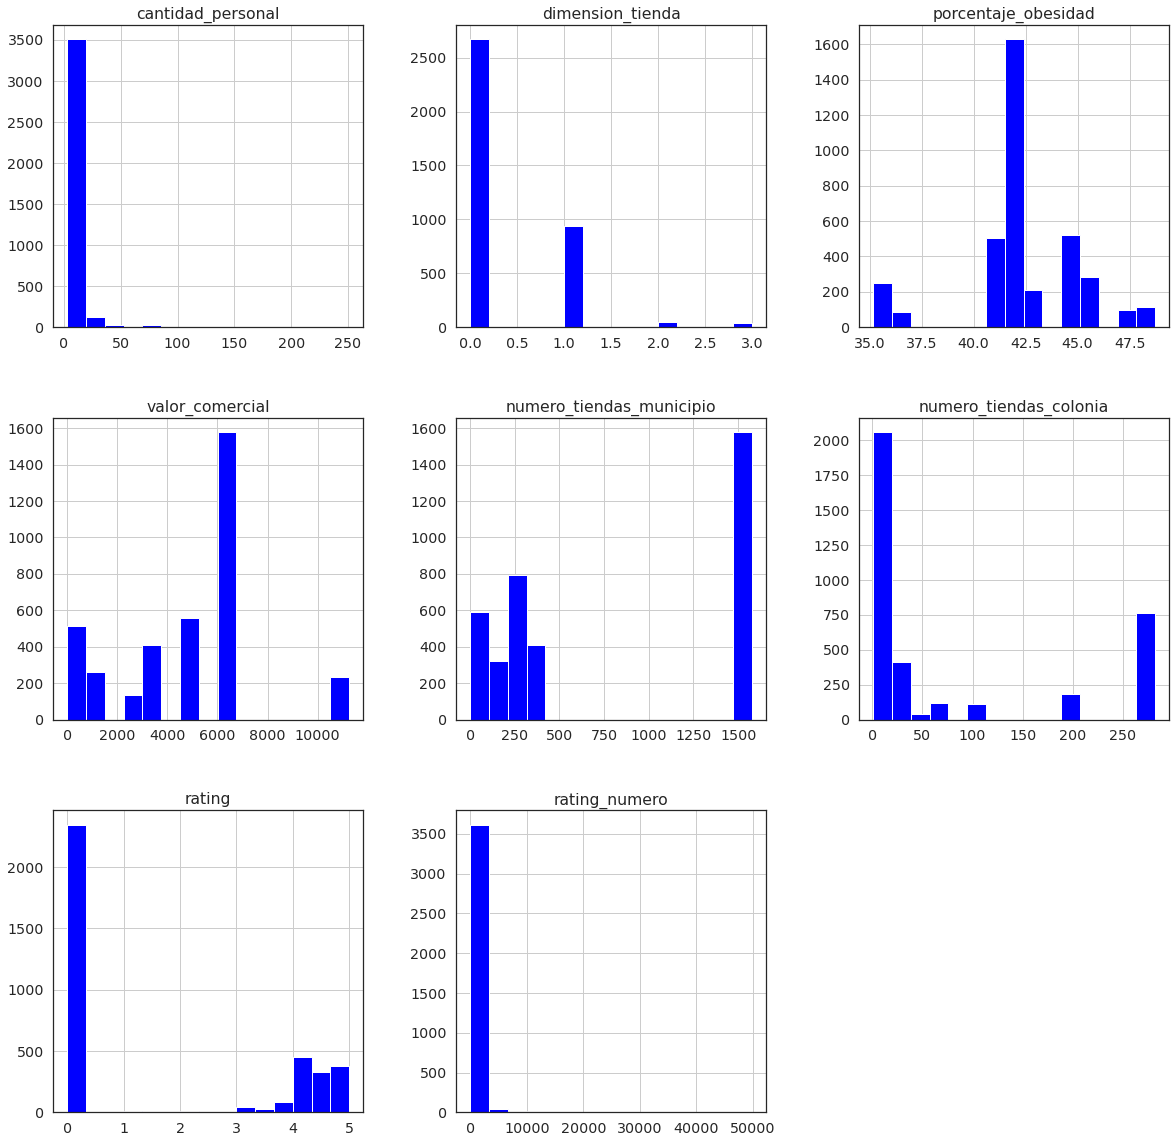

In [ ]:
sns.set(style = "white", font_scale=1.3, rc= {'figure.figsize':(20, 20)})
ax = nuevo_leon_poi_pca.hist(bins=15, color = 'blue')

Tal como lo mencionamos anteriormente, es necesario crear una escala única para cada uan de nuestras variables, para esto nos ayudaremos de la función StandardScaler de sklearn

In [ ]:
# Vamos a crear una escala única
# En estadistica dividimos en metodos paramétricos (siguen la distribución normal) y no paramétricos. Lo que usamos para reescalar es volver a una media 0 y a una desviación estándar 1, es decir, tener una distribución normal típica
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
nuevo_leon_poi_pca_cluster = nuevo_leon_poi_pca.copy()
nuevo_leon_poi_pca_cluster[nuevo_leon_poi_pca_cluster.columns] = std_scaler.fit_transform(nuevo_leon_poi_pca_cluster) # Estandarizo mis datos

In [ ]:
nuevo_leon_poi_pca_cluster.head(15) # Tenemos una escala única para todas las variables

,cantidad_personal,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,rating,rating_numero
0,1.318229,-0.564153,-0.043221,0.537774,1.147004,-0.661882,-0.746127,-0.146411
1,0.234520,-0.564153,-0.043221,0.537774,1.147004,-0.598338,-0.746127,-0.146411
2,1.318229,4.845563,-2.652250,0.008197,-0.825540,-0.670960,-0.746127,-0.146411
3,-0.182291,-0.564153,-0.043221,0.537774,1.147004,1.852674,1.195479,2.587427
4,-0.182291,-0.564153,-0.043221,0.537774,1.147004,1.852674,-0.746127,-0.146411
5,1.318229,1.239086,-0.043221,0.537774,1.147004,1.798207,-0.746127,-0.146411
6,-0.182291,-0.564153,1.095713,2.403613,-0.844806,-0.689116,-0.746127,-0.146411
7,-0.182291,1.239086,-0.043221,0.537774,1.147004,1.852674,-0.746127,-0.146411
8,0.234520,1.239086,-0.043221,0.537774,1.147004,1.798207,-0.746127,-0.146411
9,-0.182291,-0.564153,-0.043221,0.537774,1.147004,1.852674,-0.746127,-0.146411


In [ ]:
nuevo_leon_poi_pca_cluster.describe()

,cantidad_personal,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,rating,rating_numero
count,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03
mean,3.920334e-16,-1.183236e-16,9.538604e-16,-8.509206e-16,-1.509242e-16,9.758996e-16,-3.870727e-15,5.016661e-16
std,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00
min,-1.822914e-01,-5.641526e-01,-2.652250e+00,-1.668050e+00,-1.190112e+00,-6.981937e-01,-7.461269e-01,-1.464112e-01
25%,-1.822914e-01,-5.641526e-01,-4.322123e-02,-3.796062e-01,-8.448061e-01,-6.800381e-01,-7.461269e-01,-1.464112e-01
50%,-1.822914e-01,-5.641526e-01,-4.322123e-02,8.197407e-03,-5.824919e-01,-6.164933e-01,-7.461269e-01,-1.464112e-01
75%,-1.822914e-01,1.239086e+00,7.134217e-01,5.377742e-01,1.147004e+00,1.008437e+00,1.242836e+00,-1.434915e-01
max,2.049154e+01,4.845563e+00,2.330147e+00,2.403613e+00,1.147004e+00,1.852674e+00,1.621686e+00,2.412139e+01


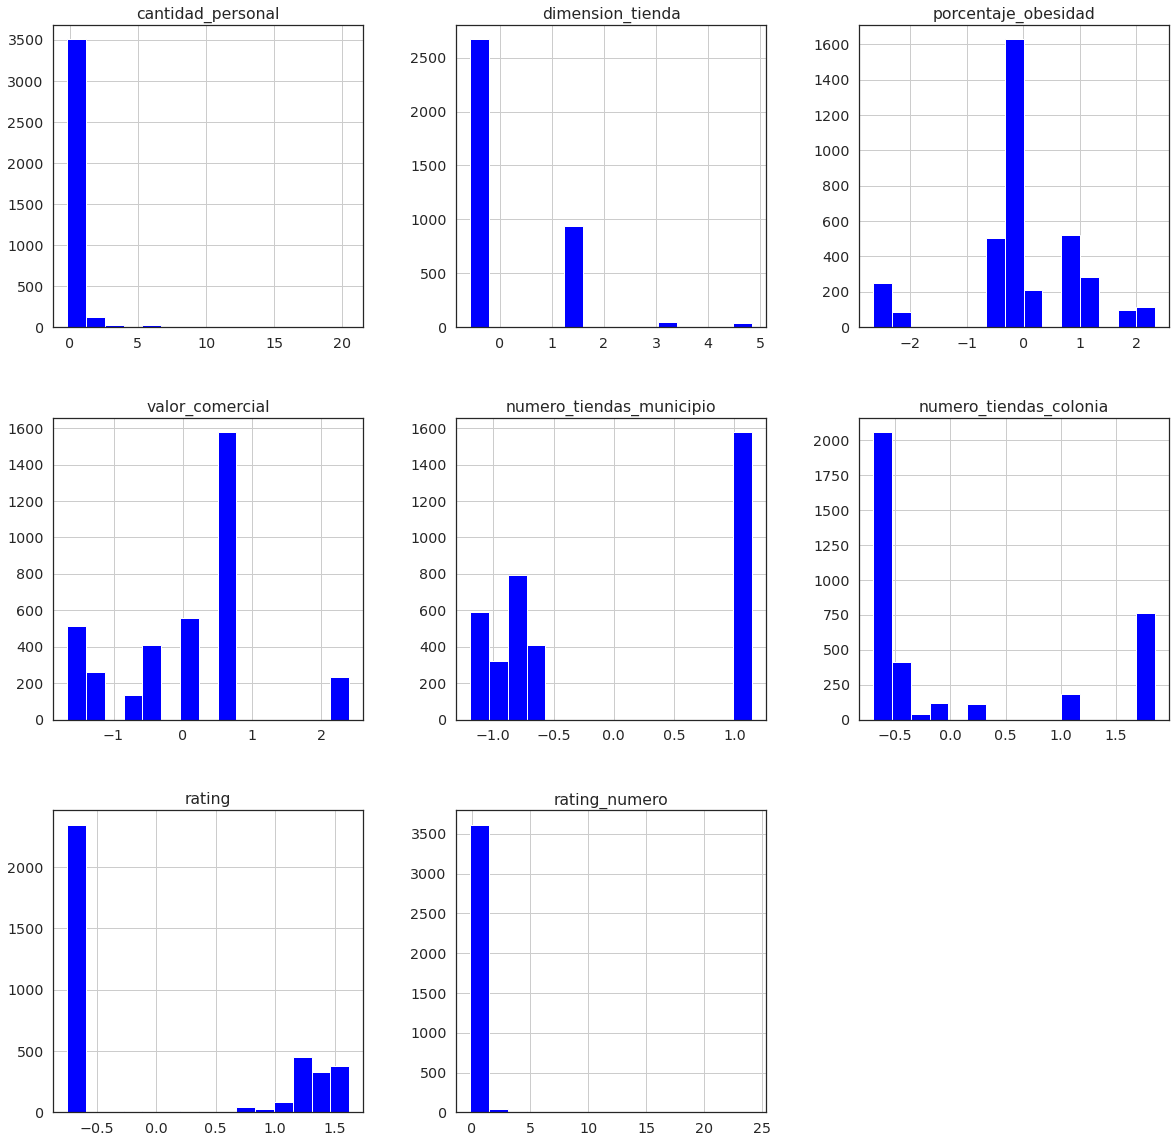

In [ ]:
# Ahora sí ya lo podemos ver las variables en la misma escala
sns.set(style = "white", font_scale=1.3, rc= {'figure.figsize':(20, 20)})
ax = nuevo_leon_poi_pca_cluster.hist(bins=15, color = 'blue')


Ahora que ya tenemos todas las variables en la misma escala, realizamos un análisis de componentes de cada una de las variables que componen el dataset y lo resumimos en dos, tomando en cuenta las variables que tenemos.

In [ ]:
from sklearn.decomposition import PCA
pca_2 = PCA(2) 
pca_2_result = pca_2.fit_transform(nuevo_leon_poi_pca_cluster)

# En cuanto la varianza acumulada sea mayor, significa que estas dos dimensiones explican muy bien las demás
# Casi 40% no es un valor muy alto, pero sí es suficiente para describir el dataset
print('Varianza acumulada explicada por 2 componentes principales: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por 2 componentes principales: 39.08%


Text(0.5, 1.0, 'Tiendas representadas por la reducción de dos dimensiones')

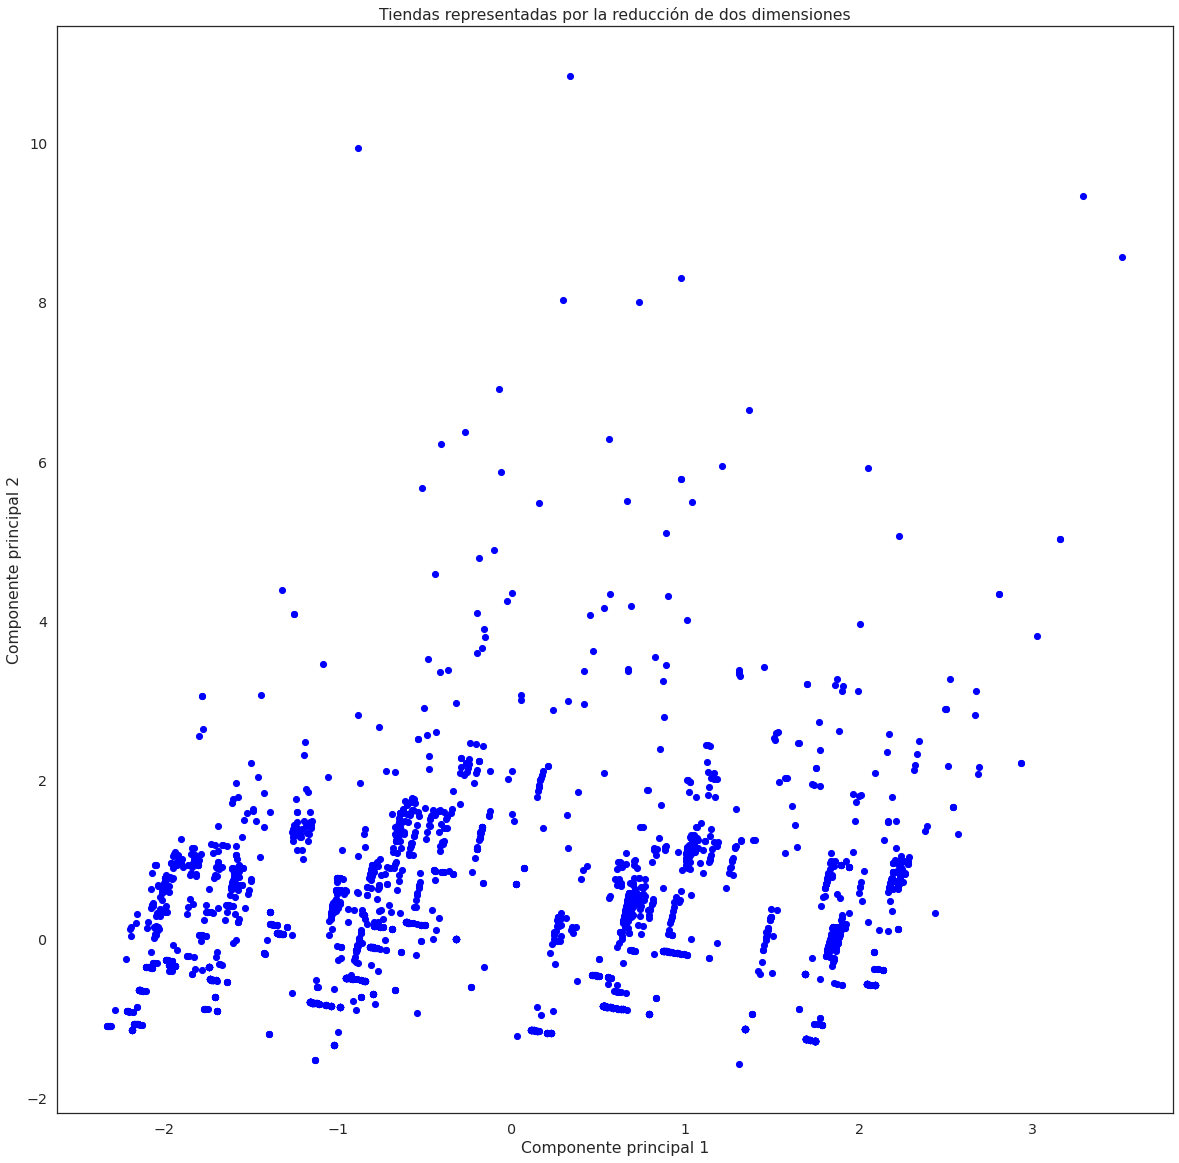

In [ ]:
plt.scatter(x=pca_2_result[:,0], y=pca_2_result[:,1], color = 'blue', lw = 1.1)

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Tiendas representadas por la reducción de dos dimensiones')
# Con estas dos dimensiones se puede comenzar con una clusterización

### MÉTODO DEL CODO Y LA SILUETA

ANÁLISIS:

El criterio de desión es que la distancia que hay entre cada grupo debe ser lo más distante. Podemos ver que cuando tentemos 5, 6, 7, 8 ya no tenemos un número óptimo. Se puede argumentar que 3 o 4 clusters pudieran ser una cantidad adecuada, sin embargo, para tomar la dedicisión nos apoyaremos del método de la SILUETA

In [ ]:
# MÉTODO DEL CODO
wcss = [] 
for i in  tqdm(range(2,10)): # Usamos tqdm para ver el tiempo de cada loop
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=15, max_iter = 500, random_state= 50) # El número de clusters va a ser igual a i
                                                                                                    # k-means++ es un contador ascendente
                                                                        
    kmeans.fit(pca_2_result) # Utilizamos la embonación. En esta ocasción no estamos usando train_test_split para generar la partición, vamos a decir que son todos los datos
    wcss.append(kmeans.inertia_) # con el append hacemos que nos vaya guardando los resultados de cada loop en la variable que creamos de wcss

100%|██████████| 8/8 [00:01<00:00,  6.08it/s]


ANÁLSIS:

En el método de la silueta el Score más alto es el que nos interesa El método de la silueta me dice que el número de clusters ideal debería se 3.

In [ ]:
# MÉTODO DE LA SILUETA

silhouette = {} # Creamos un diccionario

for i in tqdm(range(2, 10)):
  kmeans =  cluster.KMeans(n_clusters = i, init = 'k-means++', n_init=15, max_iter = 500, random_state=50) 
  kmeans.fit(pca_2_result)
  silhouette[i] = silhouette_score(pca_2_result, kmeans.labels_, metric = 'euclidean') # Utilizamos 'i' como la variable de iteración
                                                                                       # Utilizamos como métrica la distancia euclidiana   

100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


DECISIÓN:

Tras este análisis obtenemos dos valores diferentes. Mientras que el método del codo nos dide que el número de clusters ideal son 3, con el método de la silueta también confirmamos que el número de clusters ideal deben ser 3.

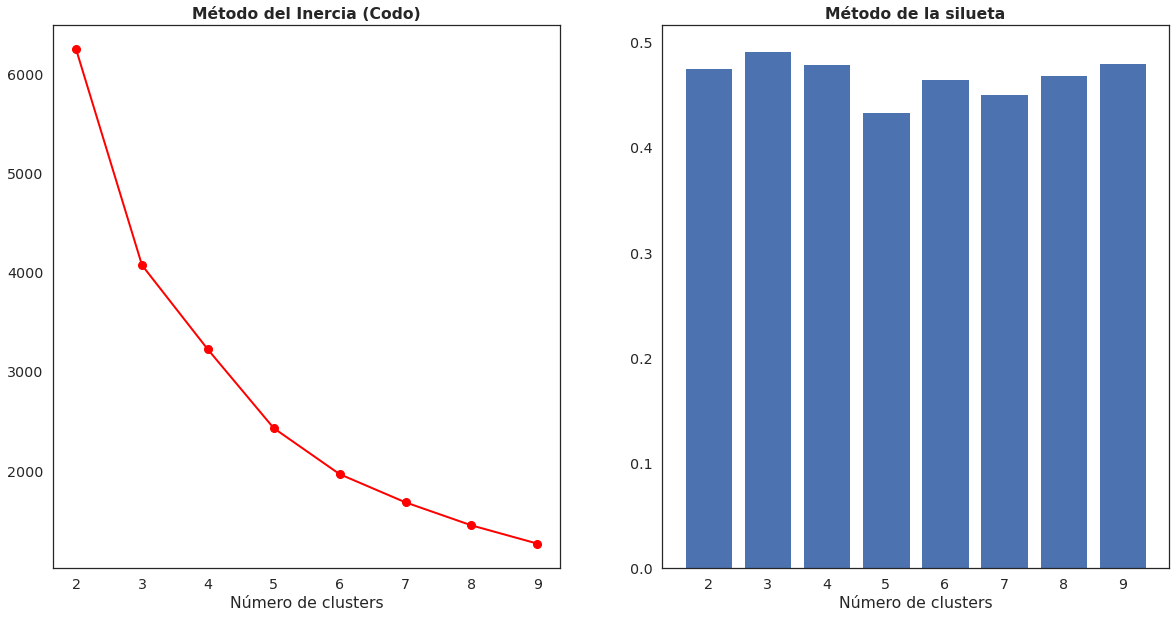

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1) # Hacemos dos gráficas emparentadas, una después de la otra
plt.plot(range(2, len(wcss)+2), wcss, marker = 'o', lw=2, ms=8, color= 'red') # Con marker le indico que me maque los codos
plt.xlabel("Número de clusters")
plt.title('Método del Inercia (Codo)',fontweight = 'bold')
plt.subplot(1,2,2)

plt.bar(range(len(silhouette)), list(silhouette.values()))
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.title('Método de la silueta',fontweight = 'bold')
plt.xlabel("Número de clusters")

plt.show()

### Gráfiquemos visualmento nuestros centroides y los clusters

In [ ]:
pca_2_result

array([[ 0.70025794, -0.14389706],
       [ 0.61670156, -0.66365316],
       [ 0.41783361,  2.95201809],
       ...,
       [ 1.34054873, -1.13374534],
       [ 1.85290262, -0.01488258],
       [ 0.22654891, -1.1836622 ]])

Graficamos con la elección de 3 clusters obtenidos por el método del codo y la silueta.

In [ ]:
kmeans = KMeans( n_clusters = 3, init = 'k-means++')
kmeans.fit(pca_2_result)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(pca_2_result) # Utilizamos predict
pca_2_result_df = pd.DataFrame(pca_2_result)

[[-1.28997088 -0.11869931]
 [ 1.17485094 -0.51673646]
 [ 0.48801949  2.03029362]]


In [ ]:
# Renombramos los campo del DataFrame 
column_name = {
    0: 'componente_principal_1',
    1: 'componente_principal_2',
}
pca_2_result_df = pca_2_result_df.rename(columns=column_name)

In [ ]:
pca_2_result_df

,componente_principal_1,componente_principal_2
0,0.700258,-0.143897
1,0.616702,-0.663653
2,0.417834,2.952018
3,1.944387,0.909434
4,1.743896,-1.277900
...,...,...
3690,1.687935,-0.438908
3691,0.525180,-0.842336
3692,1.340549,-1.133745
3693,1.852903,-0.014883


[2 2 0 ... 2 2 2]


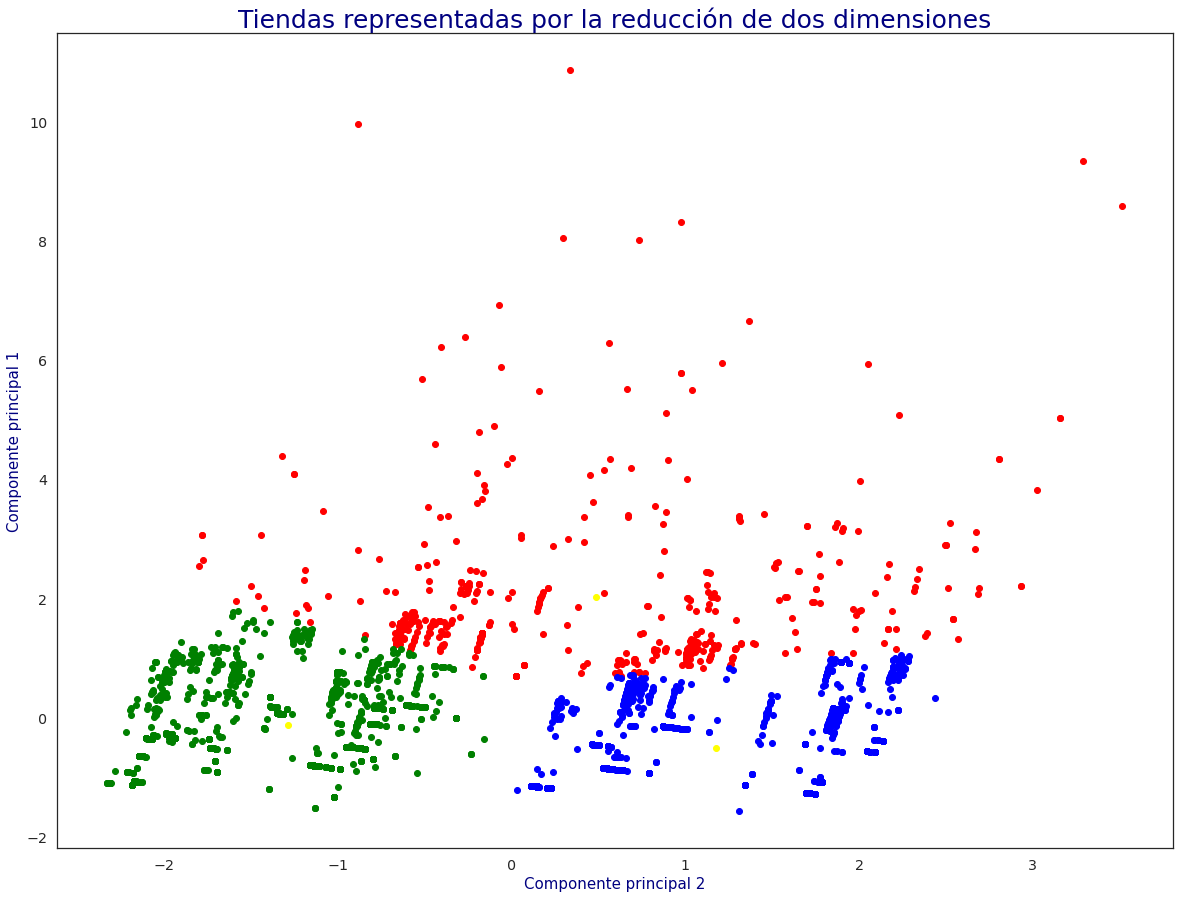

In [ ]:
pca_2_result_df["label"] = clusters #  Vamos a generar una nueva variable que se llame "label" dentro de "data" y voy a igualarla con Clusters
print(clusters) # Aquí imprimimos el cluster que corresponse, 0 es el primer cluster, 1 es el segundo y 2 es el tercero
                # 0, 1 y 2 es una variable categórica que empata a que cluster empata cada observación

# Clusterización sirve muy bien para segmentar, utilizamos una clasificación geométrica para comenzar a clasificar nuestros puntos 
fig = plt.figure(figsize=(20, 15))
plt.scatter(pca_2_result_df.componente_principal_1[pca_2_result_df.label == 0 ],pca_2_result_df.componente_principal_2[pca_2_result_df.label == 0],color = "red") # Label == 0 indica los elementos que pertenecen al primer cluster
plt.scatter(pca_2_result_df.componente_principal_1[pca_2_result_df.label == 1 ],pca_2_result_df.componente_principal_2[pca_2_result_df.label == 1],color = "green")
plt.scatter(pca_2_result_df.componente_principal_1[pca_2_result_df.label == 2 ],pca_2_result_df.componente_principal_2[pca_2_result_df.label == 2],color = "blue")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "yellow") # Pintamos los centroides, posición 'x' y 'y'
plt.title('Tiendas representadas por la reducción de dos dimensiones',fontsize=25, ha="center", color='Navy');
plt.ylabel('Componente principal 1',fontsize=15, ha="center", color='Navy');
plt.xlabel('Componente principal 2',fontsize=15, ha="center", color='Navy');